<a href="https://colab.research.google.com/github/timlok123/PHYS3151-Machine-Learning-in-Physics-2025/blob/main/support-vector-machine/SVMIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
!git clone https://github.com/timlok123/PHYS3151-Machine-Learning-in-Physics-2025.git

fatal: destination path 'PHYS3151-Machine-Learning-in-Physics-2024' already exists and is not an empty directory.


In [ ]:
df = pd.read_csv('/content/PHYS3151-Machine-Learning-in-Physics-2024/support-vector-machine/Iris.csv')
df = df.drop(['Id'],axis=1)
target = df['Species']
s = set()
for val in target:
    s.add(val)
s = list(s)
rows = list(range(100,150))
df = df.drop(df.index[rows])

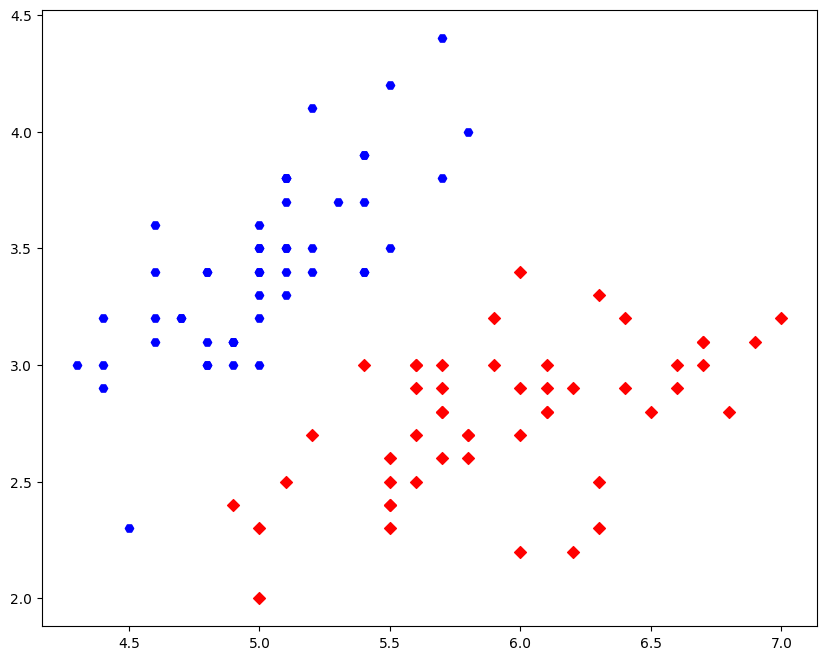

In [ ]:
x = df['SepalLengthCm']
y = df['SepalWidthCm']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(10,8))
plt.scatter(setosa_x, setosa_y, marker='H', color='blue')
plt.scatter(versicolor_x, versicolor_y, marker='D', color='red')
plt.show()

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np

## Drop the other two features and extract the target values

df = df.drop(['PetalLengthCm','PetalWidthCm'],axis=1)
Y = []
target = df['Species']
for val in target:
    if(val == 'Iris-setosa'):
        Y.append(-1)
    else:
        Y.append(1)
df = df.drop(['Species'],axis=1)
X = df.values.tolist()

## Shuffle and split the data into training and testing set
X, Y = shuffle(X,Y)
x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_train = y_train.reshape(90,1)
y_test = y_test.reshape(10,1)

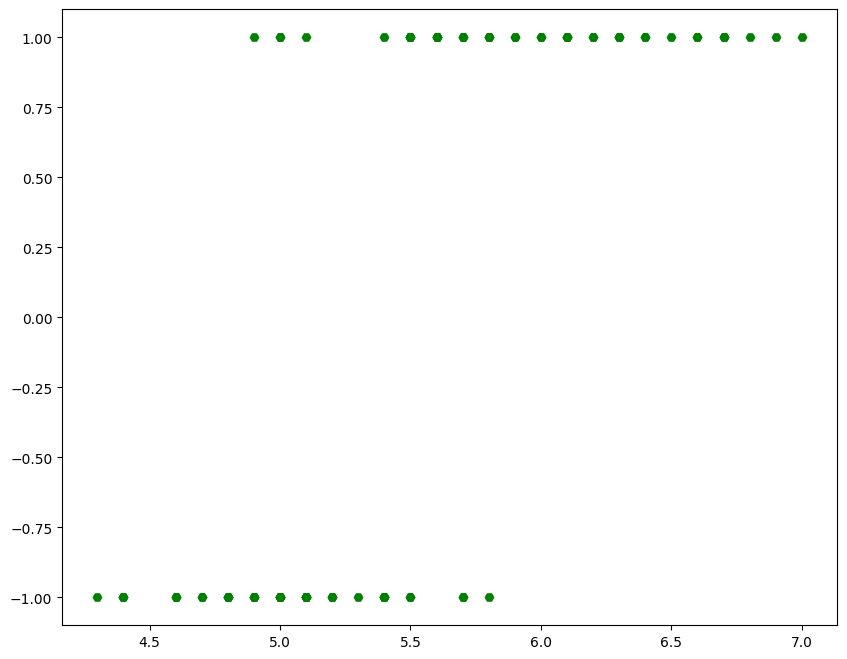

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x_train[:,0], y_train, marker = 'H', color='Green')
plt.show()

In [ ]:
# start the gradient descent

train_f1 = x_train[:,0]
train_f2 = x_train[:,1]

train_f0 = np.ones((90,1))
train_f1 = train_f1.reshape(90,1)
train_f2 = train_f2.reshape(90,1)

#w1 = np.zeros((90,1))
#w2 = np.zeros((90,1))
#w0 = np.zeros((90,1))

w1 = 0
w2 = 0
w0 = 0

epochs = 1
alpha = 0.01

while (epochs < 30000):
    y = w1 * train_f1 + w2 * train_f2 + w0
    prod = y * y_train
 #   print(epochs)
    count = 0
    for val in prod:
        if (val >= 1):
            cost = 0
            w0 = w0
            w1 = w1 - alpha * ( 1/epochs * w1)
            w2 = w2 - alpha * ( 1/epochs * w2)
        else:
            cost = 1 - val
            w0 = w0 + alpha * (train_f0[count] * y_train[count])
            w1 = w1 - alpha * (1/epochs * w1 - train_f1[count] * y_train[count])
            w2 = w2 - alpha * (1/epochs * w2 - train_f2[count] * y_train[count])
        count += 1
    epochs += 1

print(prod.shape)
print(prod)
print(w1,w2,w0)

(90, 1)
[[2.11710183]
 [3.74829777]
 [5.05512964]
 [7.69549611]
 [3.63484423]
 [1.40561772]
 [2.62301597]
 [4.96035547]
 [6.98935255]
 [5.67183958]
 [5.1605849 ]
 [1.40561772]
 [2.92336012]
 [1.51107298]
 [4.8655813 ]
 [3.84841249]
 [2.41744598]
 [5.1605849 ]
 [3.01813428]
 [4.43576196]
 [3.23704309]
 [4.0353031 ]
 [5.34747551]
 [5.34747551]
 [7.08946726]
 [6.68366785]
 [5.06047019]
 [5.34747551]
 [7.5953814 ]
 [3.9485272 ]
 [2.03032594]
 [5.4662696 ]
 [7.79561083]
 [4.24087308]
 [3.42927425]
 [2.31199072]
 [5.94816381]
 [3.52938896]
 [1.01849768]
 [3.7296184 ]
 [5.7719543 ]
 [2.01698712]
 [5.87206902]
 [5.7719543 ]
 [3.14226892]
 [4.74144666]
 [6.98935255]
 [5.74793438]
 [4.55455605]
 [2.63635479]
 [4.86024075]
 [8.00118081]
 [2.33601064]
 [4.86024075]
 [4.5598966 ]
 [6.65964793]
 [2.03032594]
 [2.12510011]
 [3.22370427]
 [4.43576196]
 [1.00515885]
 [7.9010661 ]
 [5.25270134]
 [4.44110251]
 [2.53089952]
 [8.60186911]
 [1.50573244]
 [4.0353031 ]
 [3.75363832]
 [6.66498847]
 [2.8232454 

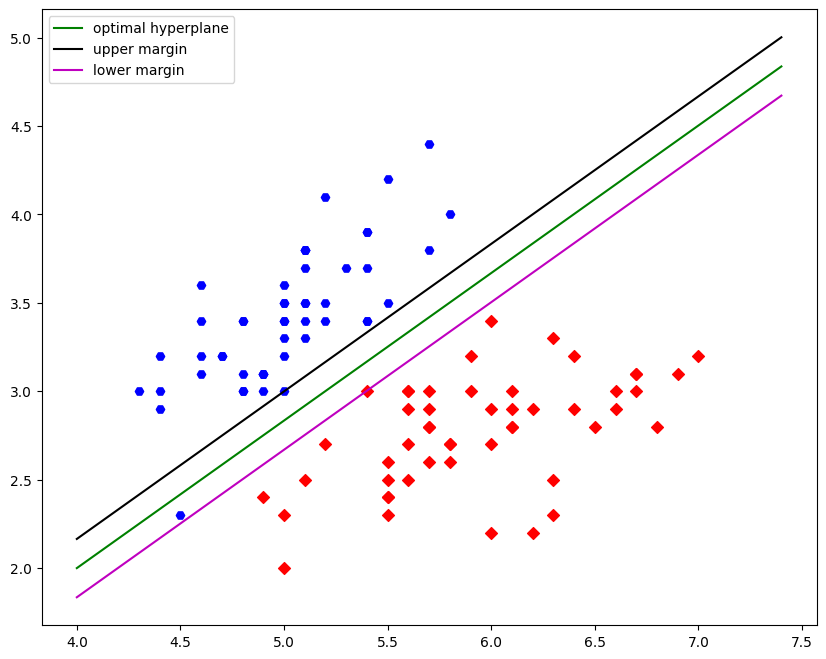

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(setosa_x, setosa_y, marker='H', color='blue')
plt.scatter(versicolor_x, versicolor_y, marker='D', color='red')
x = np.arange(4,7.5,0.1)
y = -(w1[-1]/w2[-1])*x - w0[-1]/w2[-1]
y1 = -(w1[-1]/w2[-1])*x - (1 + w0[-1])/w2[-1]
y2 = -(w1[-1]/w2[-1])*x - (-1 + w0[-1])/w2[-1]
plt.plot(x,y,label='optimal hyperplane', color = 'Green')
plt.plot(x,y1,label='upper margin', color = 'k')
plt.plot(x,y2,label='lower margin', color = 'm')
plt.legend()
plt.show()